<a href="https://colab.research.google.com/github/ThilankaPerera/week05/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: generate anomaly detection with python

import numpy as np
from sklearn.ensemble import IsolationForest

def anomaly_detection(data, contamination=0.1):
  """
  Performs anomaly detection on the given data using Isolation Forest.

  Args:
    data: A NumPy array or a list of lists representing the data points.
    contamination: The proportion of outliers in the data set.

  Returns:
    A NumPy array containing the anomaly scores for each data point.
    Anomaly scores < 0 indicate anomalies.
  """

  # Convert data to a NumPy array if it's not already.
  if not isinstance(data, np.ndarray):
      data = np.array(data)

  # Create an Isolation Forest model.
  model = IsolationForest(contamination=contamination, random_state=42)

  # Fit the model to the data.
  model.fit(data)

  # Get the anomaly scores for each data point.
  anomaly_scores = model.decision_function(data)

  return anomaly_scores


# Example usage
# Sample data (replace with your actual data)
data = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])

# Perform anomaly detection
anomaly_scores = anomaly_detection(data)

# Print the anomaly scores
print("Anomaly Scores:", anomaly_scores)

# Identify anomalies (scores < 0)
anomalies = np.where(anomaly_scores < 0)
print("\nAnomalies detected at indices:", anomalies[0])


Anomaly Scores: [ 0.09711818  0.06434601  0.04627454  0.0657635   0.03276356 -0.03276356]

Anomalies detected at indices: [5]


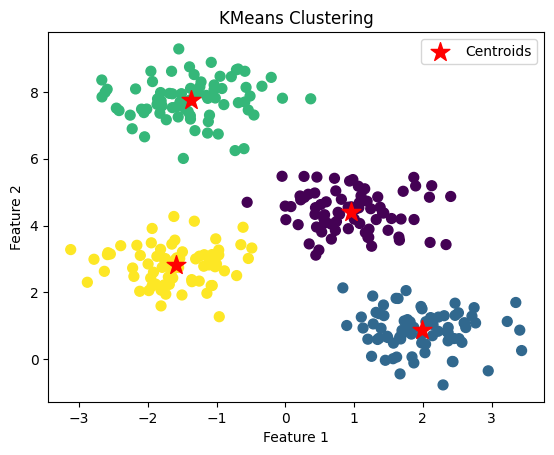

In [ ]:
# prompt: unsupervised python example

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


In [ ]:
# prompt: Association Rule python example

!pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample transaction data (replace with your actual data)
data = {'TransactionID': [1, 2, 3, 4, 5],
        'Items': [['A', 'B', 'C'], ['A', 'B', 'D'], ['B', 'E'], ['A', 'C', 'E'], ['B', 'C', 'D']]}
df = pd.DataFrame(data)


# Convert the Items column to a one-hot encoded format
df_encoded = df['Items'].str.join('|').str.get_dummies()

# Combine the transaction ID with the encoded data
df_encoded['TransactionID'] = df['TransactionID']

# Calculate frequent itemsets
frequent_itemsets = apriori(df_encoded.drop('TransactionID', axis=1), min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print the association rules
rules


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(A),(B),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.400000,-0.666667,0.583333
1,(B),(A),0.8,0.6,0.4,0.500000,0.833333,1.0,-0.08,0.8,-0.500000,0.400000,-0.250000,0.583333
2,(A),(C),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.250000,0.500000,0.166667,0.666667
3,(C),(A),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.250000,0.500000,0.166667,0.666667
4,(D),(A),0.4,0.6,0.2,0.500000,0.833333,1.0,-0.04,0.8,-0.250000,0.250000,-0.250000,0.416667
5,(E),(A),0.4,0.6,0.2,0.500000,0.833333,1.0,-0.04,0.8,-0.250000,0.250000,-0.250000,0.416667
6,(C),(B),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.400000,-0.666667,0.583333
7,(B),(C),0.8,0.6,0.4,0.500000,0.833333,1.0,-0.08,0.8,-0.500000,0.400000,-0.250000,0.583333
8,(B),(D),0.8,0.4,0.4,0.500000,1.250000,1.0,0.08,1.2,1.000000,0.500000,0.166667,0.750000
9,(D),(B),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000


In [ ]:
# prompt: 5 code examples on python sklearn

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# Linear Regression Example
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")


# Decision Tree Classification Example
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")


# SVM Classification Example
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"SVM Accuracy: {accuracy}")


# K-Nearest Neighbors Example
X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=0.80)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")


# Logistic Regression Example
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy : {accuracy}")


Linear Regression MSE: 0.7346938775510206
Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0
KNN Accuracy: 0.9
Logistic Regression Accuracy : 0.95


In [ ]:
# prompt: 5 code examples on python sklearn with using real datasets

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR


# 1. Logistic Regression on Breast Cancer Dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Breast Cancer Logistic Regression Accuracy: {accuracy}")


# 2. Random Forest Classifier on Wine Dataset
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Wine Random Forest Accuracy: {accuracy}")


# 3. Support Vector Regression on Diabetes Dataset
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate using appropriate metrics for regression (e.g. Mean Squared Error)
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Diabetes SVR Mean Squared Error: {mse}")


# 4.  Logistic Regression on Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Iris Logistic Regression Accuracy : {accuracy}")


# 5. Example with a CSV file (replace 'your_file.csv' with your actual file path)
# Assuming your CSV has a column named 'target' for the target variable

# try:
#     df = pd.read_csv('your_file.csv')
#     X = df.drop('target', axis=1)
#     y = df['target']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Use a suitable model
#     model = LogisticRegression(max_iter=1000)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"CSV File Logistic Regression Accuracy: {accuracy}")
# except FileNotFoundError:
#     print("Error: 'your_file.csv' not found. Please provide a valid file path.")
# except KeyError:
#     print("Error: 'target' column not found in the CSV file.")
# except Exception as e:
#     print(f"An error occurred: {e}")


Breast Cancer Logistic Regression Accuracy: 0.956140350877193
Wine Random Forest Accuracy: 1.0
Iris Logistic Regression Accuracy : 0.9777777777777777


In [ ]:
# prompt: code example on tendsorflow with installing

!pip install tensorflow

import tensorflow as tf

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Example TensorFlow code: Create a simple tensor
tensor = tf.constant([[1, 2], [3, 4]])
print(f"Tensor:\n{tensor}")

# Perform an operation on the tensor
result = tf.add(tensor, 1)
print(f"Tensor + 1:\n{result}")


TensorFlow version: 2.18.0
Tensor:
[[1 2]
 [3 4]]
Tensor + 1:
[[2 3]
 [4 5]]


In [ ]:
# prompt: tensorflow machine learning example

import tensorflow as tf

# Define a sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)), # Input layer with 784 features
  tf.keras.layers.Dropout(0.2), # Dropout layer for regularization
  tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=32) # Reduced epochs for demonstration

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8596 - loss: 0.4876
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9544 - loss: 0.1522
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1150
Test Loss: 0.1013619527220726
Test Accuracy: 0.9693999886512756
